In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report



In [2]:
train=pd.read_csv("C:/Users/loukya/Downloads/ML GRAD PROJECT/loan-train.csv")
test=pd.read_csv("C:/Users/loukya/Downloads/ML GRAD PROJECT/loan-test.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [6]:
#dropping the Loan_ID column for train-data
train.drop(['Loan_ID'],axis=1,inplace=True)
#dropping the Loan_ID column for test-data
test.drop(['Loan_ID'],axis=1,inplace=True)

# Observations


In [7]:
# showing categorical variables
categorical_features_train = (train.select_dtypes(include=['object']).columns)
print(categorical_features_train)
#showing continuous variables
continous_features_train = (train.select_dtypes(exclude=['object']).columns)
print(continous_features_train)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


# For Categorical Features

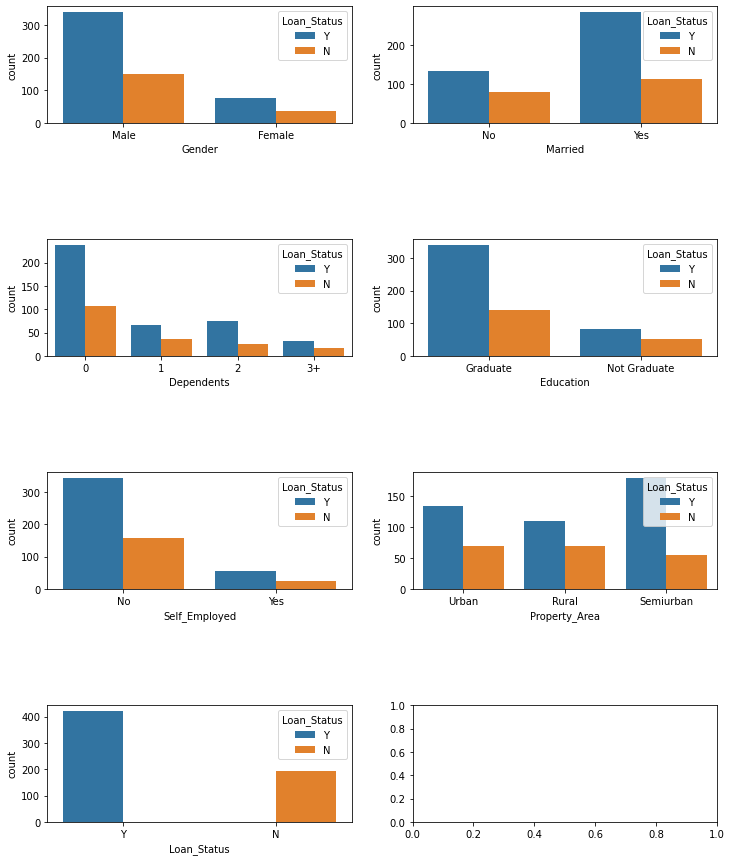

In [8]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_features_train):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train,hue='Loan_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

Plots above convey following things about the dataset:

1)Loan Approval Status: About 2/3rd of applicants have been granted loan.

2)Sex: There are more Men than Women (approx. 3x)

3)Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.

4)Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.

5)Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval

6)Employment: 5/6th of population is not self employed.

7)Property Area: More applicants from Semi-urban and also likely to be granted loans.

8)Applicant with credit history are far more likely to be accepted.

9)Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).

# Preprocessing

In [9]:
train.isnull().sum()


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

<AxesSubplot:>

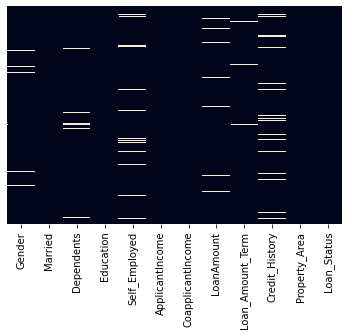

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [12]:
#filling all the continuous variables for train-data
train.fillna(train.mean(),inplace=True)
#filling all the categorical variables for train-data
train['Gender']=train['Gender'].fillna(train['Gender'].mode()[0])
train['Married']=train['Married'].fillna(train['Married'].mode()[0])
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed']=train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mode()[0])
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
train['Credit_History']=train['Credit_History'].fillna(train['Credit_History'].mode()[0])

In [13]:
#test data-set
test.fillna(test.mean(),inplace=True)
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])
test['Married']=test['Married'].fillna(test['Married'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mode()[0])
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mode()[0])

<AxesSubplot:>

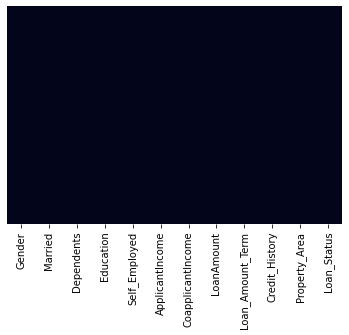

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)


In [15]:
##combining the train and test data-set
train_copy=train.copy()
test_copy=test.copy()
traintest=pd.concat([train,test],axis=0)
print(traintest.shape)
traintest.head()

(981, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [16]:
# using one hot encoding 
traintest_copy=traintest.copy()
traintest = pd.get_dummies(traintest,drop_first=True)
print(traintest.shape)
traintest.head()


(981, 15)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [17]:
#Splitting the data set
train=traintest.iloc[:614]
test=traintest.iloc[614:,:]
(train.shape),(test.shape)

((614, 15), (367, 15))

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

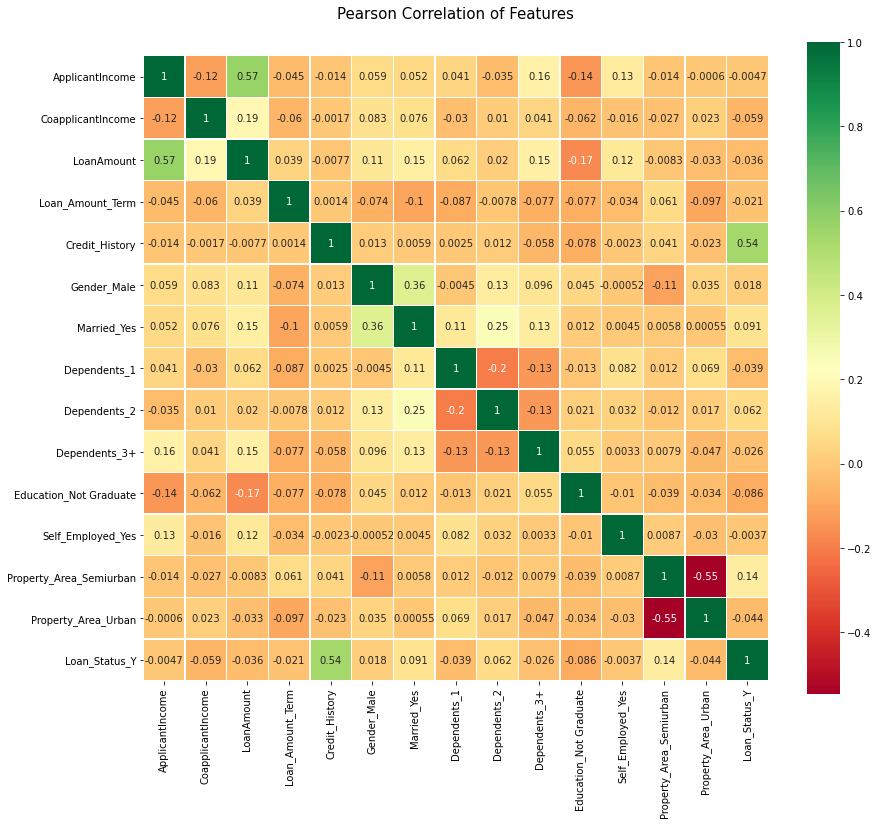

In [18]:
#checking correlation
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='RdYlGn', linecolor='white', annot=True)

In [19]:
test.drop(['Loan_Status_Y'],axis=1,inplace=True)


In [20]:
X = train.drop(columns='Loan_Status_Y')
y = train['Loan_Status_Y']

In [21]:
from sklearn.model_selection import cross_val_score
def cv(model,cv=10):
    cvx= np.sqrt(cross_val_score(model, X, y, scoring="accuracy", cv=10))
    return(cvx)

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
print("Train Accuracy =",cv(log_classifier, cv=10).mean())

Train Accuracy = 0.8921531795435378


In [23]:
log_classifier.fit(X,y)
pred=log_classifier.predict(test)
print("Test Accuracy =",pred.mean())
print("Logistic Regression:")
print(classification_report(y, log_classifier.predict(X)))

Test Accuracy = 0.8337874659400545
Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.42      0.56       192
           1       0.79      0.96      0.86       422

    accuracy                           0.79       614
   macro avg       0.81      0.69      0.71       614
weighted avg       0.80      0.79      0.77       614



# K-Nearest Neighbours


In [24]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier(n_neighbors=18)


In [25]:
k.fit(X,y)
knn_pred=k.predict(test)
print("Test Accuracy =",knn_pred.mean())
print("K-Nearest Neighbors:")
print(classification_report(y, k.predict(X)))

Test Accuracy = 0.9237057220708447
K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.54      0.18      0.27       192
           1       0.71      0.93      0.81       422

    accuracy                           0.70       614
   macro avg       0.63      0.55      0.54       614
weighted avg       0.66      0.70      0.64       614



# Random Forest


In [26]:
from sklearn.ensemble import RandomForestClassifier
random_classifier = RandomForestClassifier(n_estimators=40,max_depth=3)
print("Train Accuracy =",cv(random_classifier, cv=10).mean())

Train Accuracy = 0.8995705573935101


In [27]:
random_classifier.fit(X,y)
random_pred=random_classifier.predict(test)
print("Test Accuracy =",random_pred.mean())
print("Random Forest:")
print(classification_report(y, random_classifier.predict(X)))

Test Accuracy = 0.8392370572207084
Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.43      0.59       192
           1       0.79      0.99      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.73       614
weighted avg       0.83      0.81      0.79       614



[Text(418.5, 475.65000000000003, 'X[6] <= 0.5\ngini = 0.432\nsamples = 389\nvalue = [194, 420]'),
 Text(209.25, 339.75, 'X[4] <= 0.421\ngini = 0.477\nsamples = 141\nvalue = [89, 138]'),
 Text(104.625, 203.85000000000002, 'X[0] <= 2235.0\ngini = 0.193\nsamples = 24\nvalue = [33, 4]'),
 Text(52.3125, 67.94999999999999, 'gini = 0.444\nsamples = 2\nvalue = [1, 2]'),
 Text(156.9375, 67.94999999999999, 'gini = 0.111\nsamples = 22\nvalue = [32, 2]'),
 Text(313.875, 203.85000000000002, 'X[3] <= 48.0\ngini = 0.416\nsamples = 117\nvalue = [56, 134]'),
 Text(261.5625, 67.94999999999999, 'gini = 0.0\nsamples = 2\nvalue = [3, 0]'),
 Text(366.1875, 67.94999999999999, 'gini = 0.406\nsamples = 115\nvalue = [53, 134]'),
 Text(627.75, 339.75, 'X[7] <= 0.5\ngini = 0.395\nsamples = 248\nvalue = [105, 282]'),
 Text(523.125, 203.85000000000002, 'X[3] <= 150.0\ngini = 0.366\nsamples = 198\nvalue = [74, 233]'),
 Text(470.8125, 67.94999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 5]'),
 Text(575.4375, 67.9

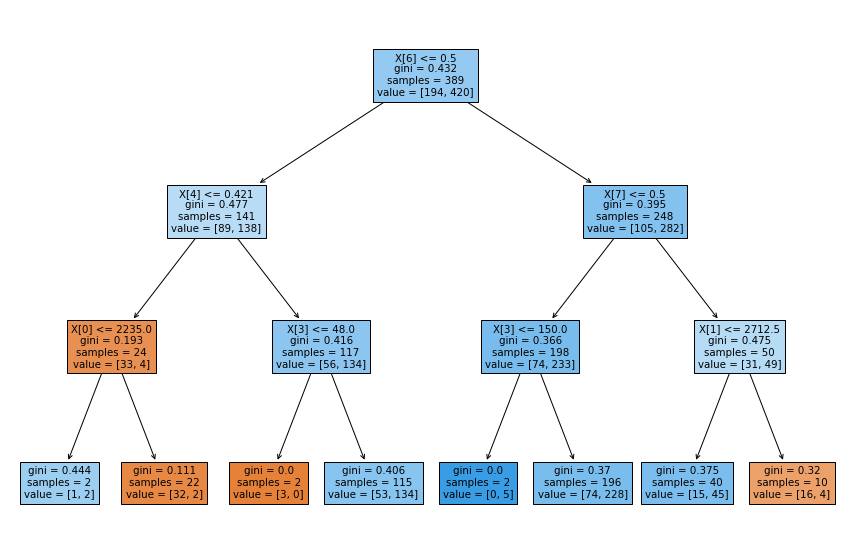

In [28]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(random_classifier.estimators_[10-1],filled=True) 

# Ada Boost

In [29]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier(learning_rate=0.5)
cv(ada_classifier,cv=10).mean()

0.8940568173117258

In [30]:
ada_classifier.fit(X,y)
ada_pred=ada_classifier.predict(test)
ada_pred.mean()
print("Ada Boost:")
print(classification_report(y, ada_classifier.predict(X)))


Ada Boost:
              precision    recall  f1-score   support

           0       0.93      0.49      0.65       192
           1       0.81      0.98      0.89       422

    accuracy                           0.83       614
   macro avg       0.87      0.74      0.77       614
weighted avg       0.85      0.83      0.81       614

